# Выбор локации для скважины

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Данные:**
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# загружаем данные
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

**1 регион**

In [3]:
# выводим первые 5 строк
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# смотрим краткую информацию
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
# смотрим краткую информацию
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
# смотрим корреляцию признаков
data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


**2 регион**

In [7]:
# выводим первые 5 строк
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
# смотрим краткую информацию
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# смотрим краткую информацию
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
# смотрим корреляцию признаков
data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


**3 регион**

In [11]:
# выводим первые 5 строк
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
# смотрим краткую информацию
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
# смотрим краткую информацию
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [14]:
# смотрим корреляцию признаков
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [15]:
print(f' Количество дубликатов в 1 наборе данных: {data_0.duplicated().sum()}')
print(f' Количество дубликатов в 2 наборе данных: {data_1.duplicated().sum()}')
print(f' Количество дубликатов в 3 наборе данных: {data_2.duplicated().sum()}')

 Количество дубликатов в 1 наборе данных: 0
 Количество дубликатов в 2 наборе данных: 0
 Количество дубликатов в 3 наборе данных: 0


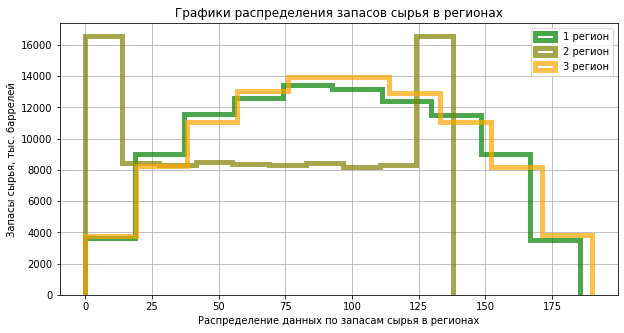

In [16]:
# график распределения запасов сырья в регионах
plt.title('Графики распределения запасов сырья в регионах')
data_0['product'].plot(kind='hist',figsize=(10,5), grid=True, legend=True, 
                       alpha=0.7, histtype='step', color='green', linewidth=5, label='1 регион')

data_1['product'].plot(kind='hist',figsize=(10,5), grid=True, legend=True, 
                       alpha=0.7, histtype='step', color='olive', linewidth=5, label='2 регион')

data_2['product'].plot(kind='hist',figsize=(10,5), grid=True, legend=True, 
                       alpha=0.7, histtype='step', color='orange', linewidth=5, label='3 регион')

plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс. баррелей')
plt.show()

***Вывод:*** были изучены данные, содержащие информацию о трех регионах, в частности, объем запасов в скважине (тыс. баррелей). Пропусков или дублирования в данных не было. График распределения запасов по регионам показывает значительную разницу в регионе 2, в отличие от регионов 1 и 3, где графики практически идентичны.

## Обучение и проверка модели

In [17]:
# так как наборы данных различны только по значениям, создадим функцию
def standart_and_train_test(data):
    # выделяем целевой признак
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    # разделяем данные на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target,
                                                                                  test_size=0.25, 
                                                                                  random_state=25)
    # масштабируем данные
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    # обучаем модели линейной регрессии
    model = LinearRegression()
    model.fit(features_train, target_train)
    # делаем предсказания
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    # вычисляем ошибку RMSE на валидационных данных
    rmse = mean_squared_error(predictions, target_valid, squared=False)
    # вычисляем средний запас предсказанного сырья
    av_product = predictions.mean()
    
    print(f'RMSE: {rmse}')
    print(f'Average production: {av_product}')
    
    return (predictions, target_valid.reset_index(drop=True), rmse)

In [18]:
# воспользуемся функцией для каждого набора данных 
# и сохраним предсказания, правильные ответы и RMSE на валидационной выборке 
print(f'1 регион:')
predictions_0, target_valid_0, rmse_0 = standart_and_train_test(data_0)

print(f'\n2 регион:')
predictions_1, target_valid_1, rmse_1 = standart_and_train_test(data_1)

print(f'\n3 регион:')
predictions_2, target_valid_2, rmse_2 = standart_and_train_test(data_2)

1 регион:
RMSE: 37.65053057971891
Average production: 92.65108756805346

2 регион:
RMSE: 0.8892646983510676
Average production: 69.2740152692285

3 регион:
RMSE: 40.08029177014584
Average production: 94.90290511535086


***Вывод:*** на этом этапе данные были разделены на обучающую и валидационную выборки, была обучена модель линейной регрессии и рассчитаны ошибки (RMSE). 

## Подготовка к расчёту прибыли

- При разведке региона исследуем 500 точек, из которых с помощью машинного обучения выберем 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.

***3.1. Все ключевые значения для расчётов сохраним в отдельных переменных.***

In [19]:
# бюджет на разработку скважин в регионе 10 млрд рублей
budget = 10000000000
# доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
income = 450000
# вероятность убытков должна быть меньше 2.5
target_probability_losses = 2.5/100

In [20]:
print('Cредний запас сырья в 1 регионе: %.2f тыс. баррелей'%data_0["product"].mean())
print('Cредний запас сырья в 2 регионе: %.2f тыс. баррелей'%data_1["product"].mean())
print('Cредний запас сырья в 3 регионе: %.2f тыс. баррелей'%data_2["product"].mean())

Cредний запас сырья в 1 регионе: 92.50 тыс. баррелей
Cредний запас сырья в 2 регионе: 68.83 тыс. баррелей
Cредний запас сырья в 3 регионе: 95.00 тыс. баррелей


***3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.***

In [21]:
# найдем точку безубыточности
breakeven_point = budget/income
print('Точка безубыточности: {:.0f} тыс. баррелей'.format(breakeven_point))

Точка безубыточности: 22222 тыс. баррелей


In [22]:
print(f'Средний объем нефти в скважине для безубыточного функционирования должен составлять не менее \
{np.ceil(breakeven_point/200)} тыс. баррелей')

Средний объем нефти в скважине для безубыточного функционирования должен составлять не менее 112.0 тыс. баррелей


***Вывод:*** очевидно, что объем запасов сырья в каждом регионе недостаточен для окупаемости, поэтому следует выбирать скважины с максимальными запасами.

## Расчёт прибыли 

***4.1. Выберем скважины с максимальными значениями предсказаний. 
<br>4.2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
<br>4.3. Рассчитаем прибыль для полученного объёма сырья.***

In [23]:
# функция расчета прибыли по предсказаниям
def profit(predict, count):
    selected_predictions = predict.sort_values(ascending=False)[:count]
    
    sum_selected_predictions = selected_predictions.sum()
    profit = sum_selected_predictions*income-budget
    
    print('Суммарный запас сырья в 200 лучших по объему скважин: {:.2f} тыс. баррелей'
          .format(sum_selected_predictions))
    
    print('Прибыль для полученного объёма сырья составит {:.2f} тыс. рублей'
          .format(profit/1000))
    
    return profit, sum_selected_predictions

In [24]:
print(f'Регион 1')
profit_0, raw_material_stock_0 = profit(predictions_0, 200)

print(f'\nРегион 2')
profit_1, raw_material_stock_1 = profit(predictions_1, 200)

print(f'\nРегион 3')
profit_2, raw_material_stock_2 = profit(predictions_2, 200)

Регион 1
Суммарный запас сырья в 200 лучших по объему скважин: 30957.91 тыс. баррелей
Прибыль для полученного объёма сырья составит 3931060.01 тыс. рублей

Регион 2
Суммарный запас сырья в 200 лучших по объему скважин: 27760.15 тыс. баррелей
Прибыль для полученного объёма сырья составит 2492068.16 тыс. рублей

Регион 3
Суммарный запас сырья в 200 лучших по объему скважин: 29740.39 тыс. баррелей
Прибыль для полученного объёма сырья составит 3383173.29 тыс. рублей


***Вывод:*** все регионы являются потенциально прибыльными, т.е. общий запас сырья выше точки безубыточности.

## Расчёт рисков 

***5.1. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
<br>5.2. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.***

In [25]:
# функция расчета прибыли для бутстрепа
def profit_for_bootstrap(target, predict, count):
    predictions_sorted = predict.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    
    sum_selected = selected.sum()
    profit = sum_selected*income-budget

    return profit

In [26]:
state = np.random.RandomState(25)

# функция для применения Bootstrap
def bootstrap(target, predictions):
    values = []
    count = 0
    
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index] 
        values.append(profit_for_bootstrap(target_subsample, pred_subsample, 200));
        
    for i in values:
        if i < 0:
            count += 1
    
    values = pd.Series(values)/1000000
    mean = values.mean()
    interval = st.t.interval(0.95, len(values)-1, mean, values.sem())
    risk = count/1000

    return (mean, interval, risk)

In [27]:
print('1 регион\n')
mean_0, interval_0, risk_0 = bootstrap(target_valid_0, predictions_0)
print('Средняя прибыль: {:.1f} млн. рублей'.format(mean_0))
print(f'95%-й доверительный интервал: {interval_0} млн. рублей')    
print('Риск убытков: {:.1%}'.format(risk_0))

1 регион

Средняя прибыль: 405.0 млн. рублей
95%-й доверительный интервал: (389.0286021037056, 420.962907858513) млн. рублей
Риск убытков: 5.9%


In [28]:
print('2 регион\n')
mean_1, interval_1, risk_1 = bootstrap(target_valid_1, predictions_1)
print('Средняя прибыль: {:.1f} млн. рублей'.format(mean_1))
print(f'95%-й доверительный интервал: {interval_1} млн. рублей')    
print('Риск убытков: {:.1%}'.format(risk_1))

2 регион

Средняя прибыль: 553.0 млн. рублей
95%-й доверительный интервал: (539.7234720552534, 566.2670065829692) млн. рублей
Риск убытков: 0.1%


In [29]:
print('3 регион\n')
mean_2, interval_2, risk_2 = bootstrap(target_valid_2, predictions_2)
print('Средняя прибыль: {:.1f} млн. рублей'.format(mean_2))
print(f'95%-й доверительный интервал: {interval_2} млн. рублей')    
print('Риск убытков: {:.1%}'.format(risk_2))

3 регион

Средняя прибыль: 373.2 млн. рублей
95%-й доверительный интервал: (355.90153649671095, 390.56066518440684) млн. рублей
Риск убытков: 8.9%


In [30]:
# таблица сравнения показателей по 3 регионам
comparison_table = pd.DataFrame(
    index=['Средняя прибыль в регионе, млн.руб', 'Суммарный запас сырья, тыс. баррелей', 'Риск убытка, %'], 
    columns=['1 регион','2 регион','3 регион'])

comparison_table['1 регион'] = mean_0, raw_material_stock_0, risk_0*100
comparison_table['2 регион'] = mean_1, raw_material_stock_1, risk_1*100
comparison_table['3 регион'] = mean_2, raw_material_stock_2, risk_2*100
comparison_table

,1 регион,2 регион,3 регион
"Средняя прибыль в регионе, млн.руб",404.995755,552.995239,373.231101
"Суммарный запас сырья, тыс. баррелей",30957.911144,27760.151477,29740.385095
"Риск убытка, %",5.900000,0.100000,8.900000


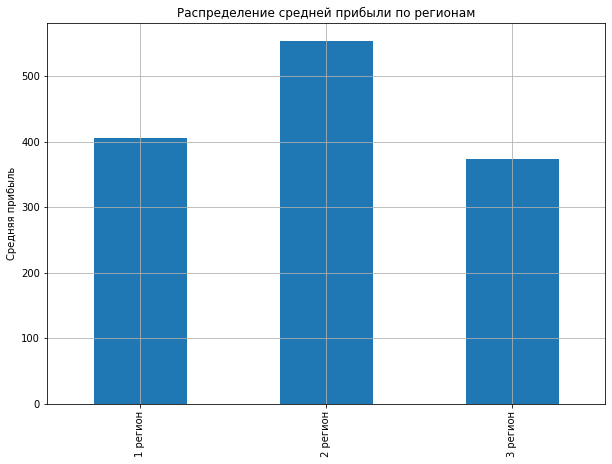

In [31]:
comparison_table.iloc[0, :].plot(kind='bar', grid=True, figsize=(10,7));
plt.ylabel('Средняя прибыль');
plt.title('Распределение средней прибыли по регионам');

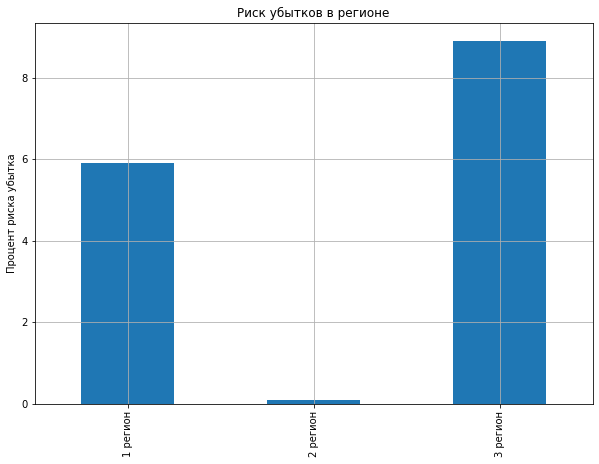

In [32]:
comparison_table.astype('float').iloc[2, :].plot(kind='bar', grid=True, figsize=(10,7));
plt.title('Риск убытков в регионе');
plt.ylabel('Процент риска убытка');

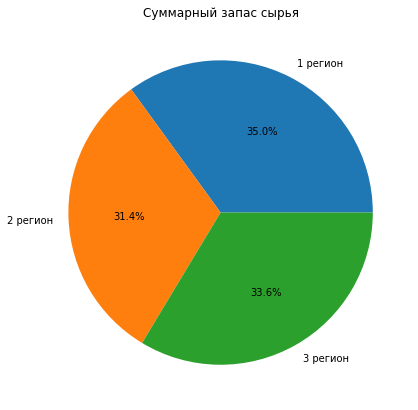

In [33]:
comparison_table.iloc[1, :].plot(kind='pie', 
                                 autopct= '%1.1f%%', 
                                 grid=True, 
                                 figsize=(10,7));
plt.title('Суммарный запас сырья');
plt.ylabel('');

***Вывод:*** в результате анализа сделан вывод, что `2 регион` является наиболее подходящим для разработки скважин, поскольку, несмотря на наименьший запас сырья в регионе, средняя прибыль в регионе самая высокая, а риск потерь минимален.

## Общий вывод

1. Были изучены данные, содержащие информацию по трем регионам. Пропусков или дублирования в данных не было. График распределения запасов по регионам показывает значительную разницу в регионе 2, в отличие от регионов 1 и 3, где графики практически идентичны.
2. Данные были разделены на обучающую и валидационную выборки, обучена линейная регрессионная модель и рассчитаны ошибки (RMSE).
3. После анализа запасов сырья стало ясно, что объем запасов сырья в каждом регионе недостаточен для окупаемости, поэтому необходимо было выбирать скважины с максимальными запасами.
4. Затем был получен вывод, что все регионы являются потенциально прибыльными, т.е. общий запас сырья выше точки безубыточности

В итоге `2 регион` выбран в качестве наиболее подходящего для разработки скважин, так как, несмотря на наименьший запас сырья в регионе, средняя прибыль от сырья в регионе самая высокая, а риск убытка минимален.